# DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a very useful clustering algorithm.

The main benefits of DBSCAN are:
- It does not require the number of clusters to be specified.
- It can find arbitrarily shaped clusters.
- It can identify points that are not part of any cluster (noise).

## Key Concepts

- **dense region**:
    - A dense region is a region in the feature space where there are many data points.
- **Core points** (core samples):
    - A core point is a point in the feature space that has at least a minimum number of other points (MinPts) within a distance of ε.
- **Border points** (boundary points):
    - A border point is a point that is not a core point but is within ε of a core point.
- **Noise points**:
    - A noise point is a point that is neither a core point nor a border point.
- **Directly density-reachable**:
    - A point p is directly density-reachable from a point q if point p is within ε distance of point q and point q is a core point.
- **Density-reachable**:
    - A point p is density-reachable from a point q if there is a chain of points p1, p2, ..., pn, where p1 = q and pn = p, such that each pi+1 is directly density-reachable from pi.
- **Density-connected**:
    - A point p is density-connected to a point q if there is a point o such that both p and q are density-reachable from o.
- **Cluster**:
    - A cluster is a set of points that are density-connected to each other.

## Parameters

- **ε (epsilon)**:
    - The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    - how it works: 
    $$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} < \epsilon$$

- **MinPts**:
    - The number of samples in a neighborhood for a point to be considered as a core point.

## Algorithm

The DBSCAN algorithm works as follows:

1. Randomly select a point that has not been visited.
2. Retrieve all points with distance ε or less from the selected point.
    - If the number of points is less than MinPts, mark the point as noise.
    - Otherwise, 
        - The selected point is labeled as a core point
        - A new cluster is created.
        - All points within ε distance are visited.
            - If they have not been assigned a cluster, assign them to the new cluster.
            - If they are core points, visit their neighbors and add them to the cluster.
3. Repeat the process until all points have been visited.

In the end, all points are labeled as:
- Core points
- Border points
- Noise points

When the DBSCAN algorithm is run on a particular dataset multiple times,

- it may produce different results due to the random selection of the starting point.
- However, the core points and the border points will remain the same.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


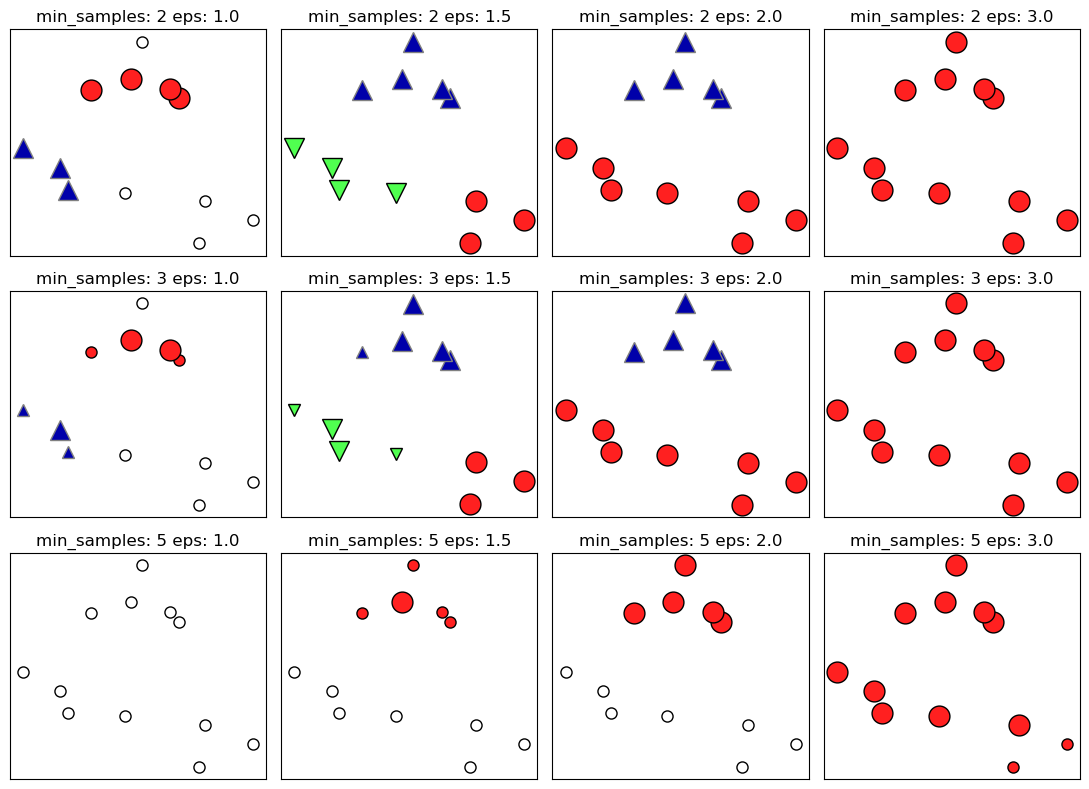

In [4]:
mglearn.plots.plot_dbscan()

- Points belong to clusters are solid
- Noise points are white.
- Core points are larger than border points.

Increasing ε (left to right):
- More points are included in the clusters.
- Fewer points are labeled as noise.

Increasing min_samples (top to bottom):

- Fewer points are labeled as core points.
- More points are labeled as noise.

## Scaling

While DBSCAN doesn't require setting the number of clusters, setting the ε controls how many clusters will be found.

- Scaling makes easier to find good ε values.

Text(0, 0.5, 'Feature 1')

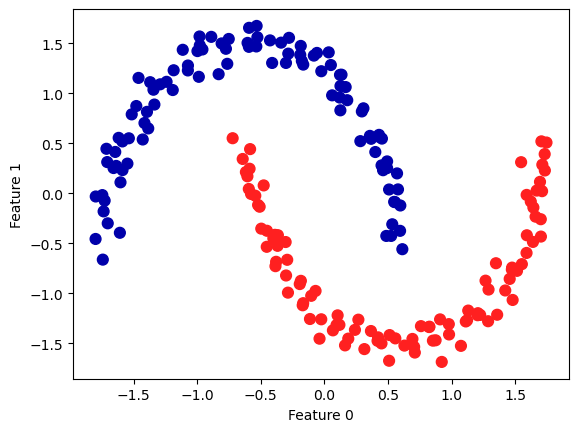

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The algorithm finds the optimal number of clusters.

Text(0, 0.5, 'Feature 1')

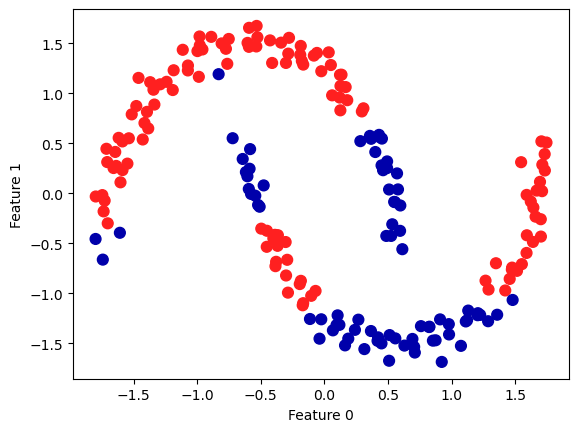

In [6]:
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

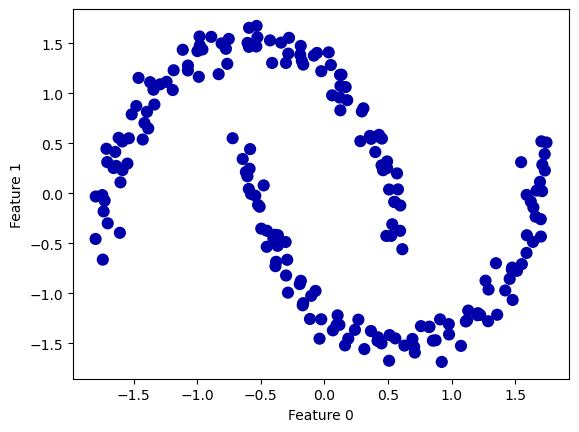

In [7]:
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

eps = 0.5:
- The number of clusters : 2

eps = 0.2:
- The number of clusters : 8

eps = 0.7:
- The number of clusters : 1